# Upflow temperature as a function of permeability (Driesner 2010)

In [ ]:
import numpy as np
from scipy.optimize import fminbound
import matplotlib.pyplot as plt
import iapws
IAPWS97_TCRIT = 647.096  #/* K */
IAPWS97_PCRIT = 22.064e6 #/* Pa */
IAPWS97_RHOCRIT = 322. #/* kg/m³ */
IAPWS97_TTRIP = 623.15
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# model parameters // iapws module has weird units (MPa vs Pa), be careful and always read the docs!
L = 50 # half-width of upflow zone [m]
P0 = 30 # mean pressure in upflow zonw [MPa]
Q0 = 86e3 # total heat flux per meter ridge axis [W/m]
g = 9.81 #gravity

# parameter space
K = np.logspace(-17, -12, num=100, endpoint=True)

In [3]:
#reference values
tmp = iapws.IAPWS97(T=5+273.15, P=P0)
rho0 = tmp.rho
h0 = tmp.h*1000 #J/Kg

In [4]:
# hide
#  function to minimize
def heat_balance_minimize(T0, k):
    steam=iapws.IAPWS97(T=T0+273.15, P=P0) # note that the unit of input T is K and P is MPa
    return np.abs(Q0 - 2*g*k*(steam.rho*(steam.h*1000 - h0)*(rho0-steam.rho))/steam.mu*L)



In [5]:
#  function to minimize
#def heat_balance_minimize(T0, k):
#    steam=iapws.IAPWS97(???) # note that the unit of input T is K, P is MPa
#    return ???



In [6]:
# hide
Q0=86e3
T_U_86kw = np.empty(K.shape)
for id, k in enumerate(K):
    T_U_86kw[id] = fminbound(func=heat_balance_minimize,x1=5, x2=450,args=(k,), xtol=1e-06) 

T_U_12kw = np.empty(K.shape)
Q0 = 12e3
for id, k in enumerate(K):
    T_U_12kw[id] = fminbound(func=heat_balance_minimize,x1=5, x2=450,args=(k,), xtol=1e-06) 


T_U_300kw = np.empty(K.shape)
Q0 = 300e3
for id, k in enumerate(K):
    T_U_300kw[id] = fminbound(func=heat_balance_minimize,x1=5, x2=450,args=(k,), xtol=1e-06) 

In [ ]:
# hide
#Q0=86e3
#T_U_86kw = np.empty(K.shape)
#for id, k in enumerate(K):
#    T_U_86kw[id] = fminbound(func=heat_balance_minimize,x1=5, x2=450,args=(k,), xtol=1e-06) 

# do this for 300kw/m and 12kw/m

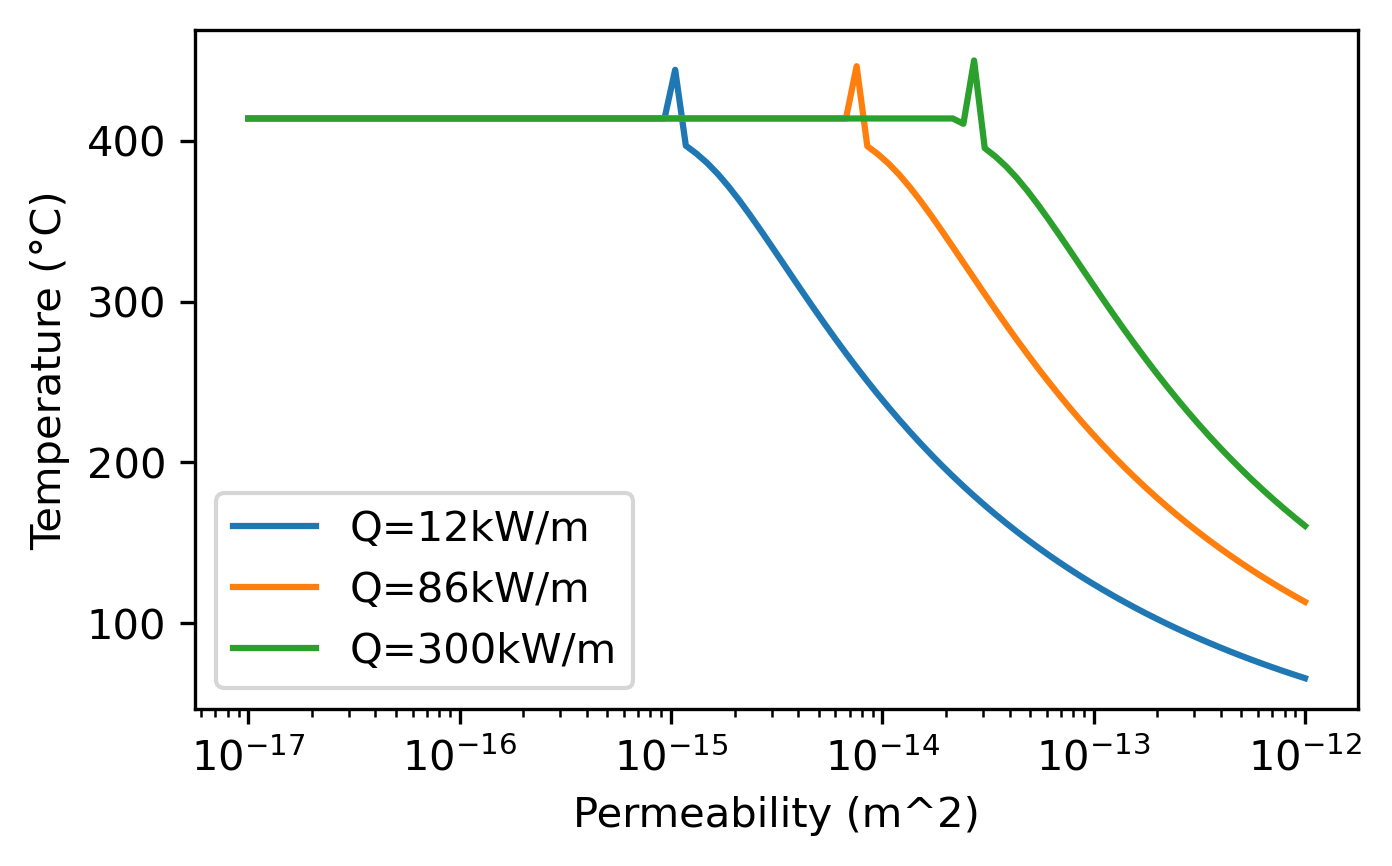

In [14]:
fig=plt.figure(figsize=(5,3))
ax=plt.gca()
ax.plot(K,T_U_12kw, label='Q=12kW/m')
ax.plot(K,T_U_86kw, label='Q=86kW/m')
ax.plot(K,T_U_300kw, label='Q=300kW/m')
ax.set_xscale('log')
ax.set_xlabel('Permeability (m^2)')
ax.set_ylabel('Temperature (°C)')
plt.legend()
